In [ ]:
"""Скрипт чтения csv - файла из google диска"""

from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
"""Библиотека Pandas предназначена для обработки и анализа табличных данных"""

!ls"content/drive/My Drive"

import io
"""Модуль io предназначен для операции ввода/вывода"""

# Считываем csv - файл в DataFrame
diabetes = pd.read_csv('/content/gdrive/My Drive/data/diabetes.csv')

# Копируем файл и сохраняем его в переменную diabet
diabet = diabetes.copy()
print()
# Выводим информацию о нашем DataFrame diabet
diabet.info()

Mounted at /content/gdrive
/bin/bash: line 1: lscontent/drive/My Drive: No such file or directory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Таблица представляет DataFrame, столбцами которой являются объекты Series. В таблице имеется 768 строк и 9 столбцов, нет пропущенных значений.  
Значения 7 столбцов ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', 'Outcome') имеют тип pd.Int64Dtype, 2 столбца ('BMI', 'DiabetesPedigreeFunction') - тип pd.Float64Dtype.

In [ ]:
# Выводим первые 5 строк таблицы
diabet.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**В описании к датасету сказано, что в выборка состоит из индейских женщин не моложе 21 года**  

**Охарактеризуем столбцы:**  
**1.Pregnancies**	 - количество беременностей.  
**2.Glucose** - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе. До 141,95 мг/дл - нормальный показатель, 141,96-198,22 - нарушение толерантности к глюкозе, более 198,22 - сахарный диабет.  
**2.BloodPressure**  - диастолическое артериальное давление (мм рт. ст.). Нормальный диапазон 60-89 мм рт.ст.  
**3.SkinThickness**	- толщина кожной складки трицепса (мм). В норме 12,3 мм для мужчин, 16,5 мм для женщин. Является показателем нутритивного статуса, 90-100% от показателя считается нормальным статусом.    
**4.Insulin** - 2-часовой сывороточный инсулин (мю Ед/мл). Точная интерпретация этого маркера на настоящий момент неизвестна.  
**5.BMI** - индекс массы тела (ИМТ). Нормальной масса тела считается при ИМТ 18,5-24,9, дефицит массы тела при ИМТ менее 18,5, избыточная масса тела - ИМТ 25-29,9, при ИМТ 30-34,9 - ожирение I ст., 35-39,9 - II ст., 40 и более - III ст.  
**6.DiabetesPedigreeFunction** - функция родословной диабета  
**7.Age** - возраст в годах  
**8.Outcome** - результат (0 - отсутствие диабета, 1 - диабет)  
***В нашем датасете 1 категориальный признак - Outcome, остальные - числовые***

***Отметим, что в столбцах 'SkinThickness' и 'Insulin' есть значения, равные 0, что не может соответствовать действительности***



In [ ]:
# Выведем последние 5 строк таблицы
diabet.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


***В тех же столбцах 'SkinThickness' и 'Insulin' есть значения, равные 0, что не может соответствовать действительности***

In [ ]:
# Проверим, в каких столбцах есть значения, равные 0
columns_with_zeros = diabet.columns[(diabet==0).any()]
for col in columns_with_zeros:
  print(col)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
Outcome


**Столбцы Pregnancies и Outcome соответствуют действительности. Беременностей может не быть, а Outcome = 0 свидетельствует об отсутствии диабета**  
**Остальные столбцы -  Glucose, BloodPressure, SkinThickness, Insulin, BMI не могут иметь значения, равные 0 - это не соответствует витальным функциям! Скорее всего, это пропущенные значения, замененные на 0**  

In [ ]:
"""Скрипт вывода количества значений, равных 0 по столбцам"""

# Посмотрим, сколько строк со значением 0 в интересующих нас столбцах
glucosenull = diabet[diabet['Glucose']==0].shape[0]
bloodpressnull = diabet[diabet['BloodPressure']==0].shape[0]
skinnull = diabet[diabet['SkinThickness']==0].shape[0]
insulinnull = diabet[diabet['Insulin']==0].shape[0]
bminull = diabet[diabet['BMI']==0].shape[0]

print(f'число строк со значением 0 в столбце Glucose {glucosenull}')
print(f'число строк со значением 0 в столбце BloodPressure {bloodpressnull}')
print(f'число строк со значением 0 в столбце SkinThickness {skinnull}')
print(f'число строк со значением 0 в столбце Insulin {insulinnull}')
print(f'число строк со значением 0 в столбце BMI {bminull}')

число строк со значением 0 в столбце Glucose 5
число строк со значением 0 в столбце BloodPressure 35
число строк со значением 0 в столбце SkinThickness 227
число строк со значением 0 в столбце Insulin 374
число строк со значением 0 в столбце BMI 11


***В столбце SkinThickness и Insulin большое количество значений равно 0, что ограничивает работу с этими столбцами и может значительно исказить результаты анализа данных.  
Так, в столбце Insulin почти половина значений (374) равна 0. В столбце SkinThickness также большое количество значений, равное 0 (227).   
Диагностическая значимость показателя сывороточного 2-х часового инсулина не подтверждена в настоящее время, а оценить нутритивный статус мы можем по ИМТ (BMI).  
В столбцах Glucose, BloodPressure, BMI менее 5% пропусков, как известно, пропуски в медицинских данных нельзя заменять, поэтому удалим эти строки.***

In [ ]:
"""Скрипт удаления столбцов:

   удаляем столбцы с большим количеством нулей"""

# Удаляем столбцы SkinThickness и Insulin
diabet = diabet.drop(columns=['SkinThickness', 'Insulin'])
# Посмотрим первые 5 строк нашей таблицы
diabet.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


**Столбцы с большим количеством нулей - SkinThickness и Insulin удалены**

In [ ]:
"""Скрипт удаления строк"""

# Удаляем строки со значениями 0 в столбцах Glucose, BloodPressure, BMI
diabet = diabet.drop(diabet[(diabet['Glucose']==0) | (diabet['BloodPressure']==0) | (diabet['BMI']==0)].index)
# В переменную null заносим результат суммы нолей по каждому столбцу
null = diabet.isnull().sum()

# Выводим результат
print(null)

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Выводим информацию о преобразованном diadet
diabet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   BMI                       724 non-null    float64
 4   DiabetesPedigreeFunction  724 non-null    float64
 5   Age                       724 non-null    int64  
 6   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 45.2 KB


**В результате преобразования получилось несовпадение записей и индексов, осуществим переиндексацию**

In [ ]:
"""Скрипт переиндексации DataFrame"""

# Осуществляем переиндексацию diabet
diabet.reset_index(inplace=True)
# Выводим информацию
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     724 non-null    int64  
 1   Pregnancies               724 non-null    int64  
 2   Glucose                   724 non-null    int64  
 3   BloodPressure             724 non-null    int64  
 4   BMI                       724 non-null    float64
 5   DiabetesPedigreeFunction  724 non-null    float64
 6   Age                       724 non-null    int64  
 7   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 45.4 KB


**В преобразованном DataFrame 724 строки, 8 столбцов**

In [ ]:
# Выводим первые 5 строк преобразованного diabet
diabet.head()

,index,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,33.6,0.627,50,1
1,1,1,85,66,26.6,0.351,31,0
2,2,8,183,64,23.3,0.672,32,1
3,3,1,89,66,28.1,0.167,21,0
4,4,0,137,40,43.1,2.288,33,1


In [ ]:
# Удаляем столбец index
diabet = diabet.drop(columns=['index'])
# Выводим первые 5 строк diabet
diabet.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [ ]:
# Выводим статистическую информацию предобработанного DataFrame diabet
diabet.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


**В нашем DataFrame представлены пациентки 21 - 81 года, медиана возраста составила 29 лет, среднее значение - 33 года.  
Количество беременностей составляет 0-17, в среднем 3 беременности.  
Обращает на себя внимание среднее значение ИМТ - 32 (ИМТ, характерный для ожирения I степени).  
Медиана уровня глюкозы составила 117, среднее значение 122, разброс данного показателя составил 44-199.  
Наследственность по диабету составила от 0,08 до 2,42 баллов, но в среднем не превышает 0,47, что говорит о невысоких показателях наследственного фактора в нашей выборке.**

**Предобработка данных проведена.  
Переходим к построению графиков взаимосвязи признаков.  
Посмотрим на взаимосвязь признаков количества беременностей и диабета.**

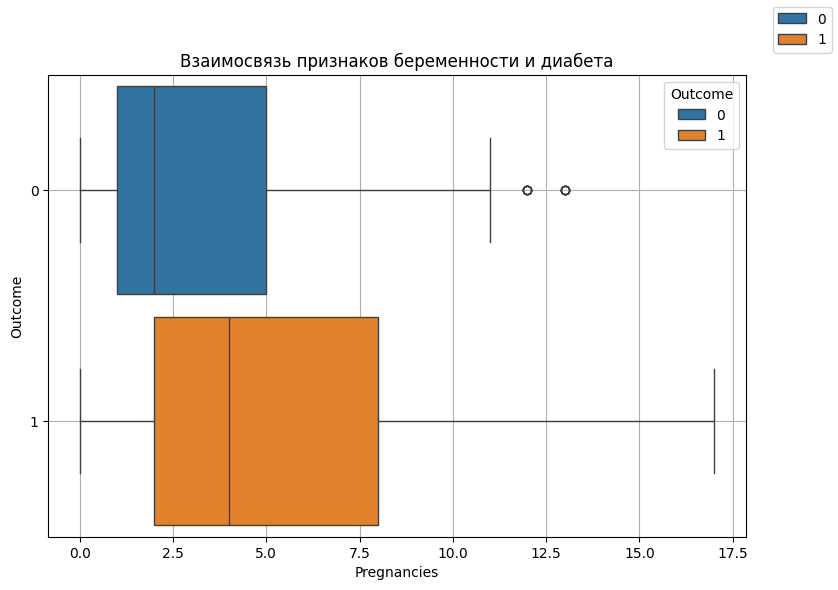

In [ ]:
"""Скрипт для построения коробчатой диаграммы

   взаимосвязи признака Pregnancies и Outcome"""

import seaborn as sns
"""Seaborn - библиотека для создания статистических графиков"""

import matplotlib.pyplot as plt
"""Matplotlib - библиотека для создания любых видов графиков"""

# Строим коробчатую диаграмму
fig = plt.figure(figsize=(9,6))
boxplot = sns.boxplot(
    data=diabet,
    y='Outcome',
    x='Pregnancies',
    orient='h',
    width=0.9,
    hue='Outcome'
    )
boxplot.set_title('Взаимосвязь признаков беременности и диабета')
boxplot.set_xlabel('Pregnancies')
boxplot.set_ylabel('Outcome')
fig.legend()
boxplot.grid()


**Выводы:**  
*1. Обе диаграммы показывают логнормальное распределение с перекосом вправо*  
*2. В диаграмме по признаку отсутствия диабета (0) есть выбросы, которые могут быть связаны как с ошибками в данных, так и с большим количеством беременностей (11, 13) в единичных случаях.  
Межквартильный размах составляет 1-5 беременностей, медиана - 2 беременности*  
*3. В диаграмме по признаку наличия диабета (1) межквартильный интервал составил 2-8, медиана 4 беременности.  
В этой группе отмечается большие границы распределения по сравнению с группой 0 (max = 17), что может быть как ошибкой в данных, нетщательным сбором анамнеза (например, учет биохимических беременностей), так и реальным акушерским анамнезом.*  
****  
**Визуализация показала наличие связи признаков числа беременностей и заболевания диабетом:  
в группе здоровых число беременностей меньше, чем в группе больных диабетом. Медиана в группе здоровых в 2 раза меньше медианы в группе больных. Известно, что беременность сопряжена с риском развития гестационного сахарного диабета, фактором риска которого являются ожирение и наследственность.  
Поэтому полезным будет анализ взаимосвязи признаков беременности, ИМТ и наследственности (DiabetesPedigreeFunction).**




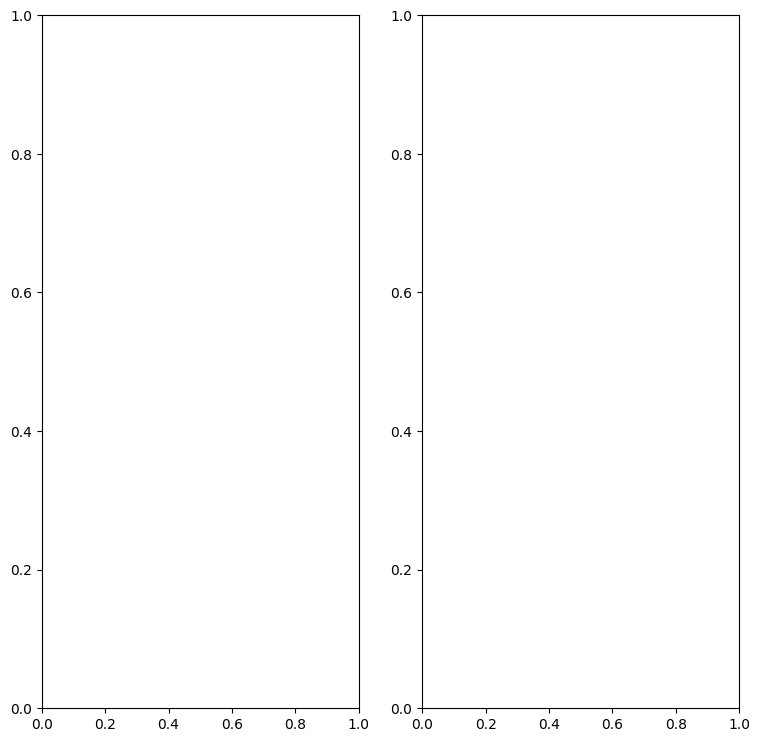

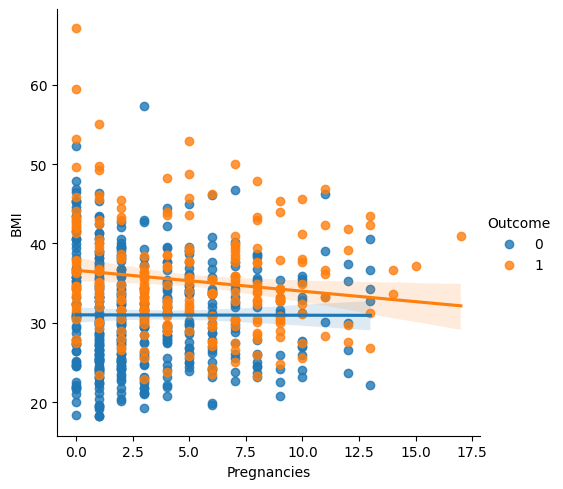

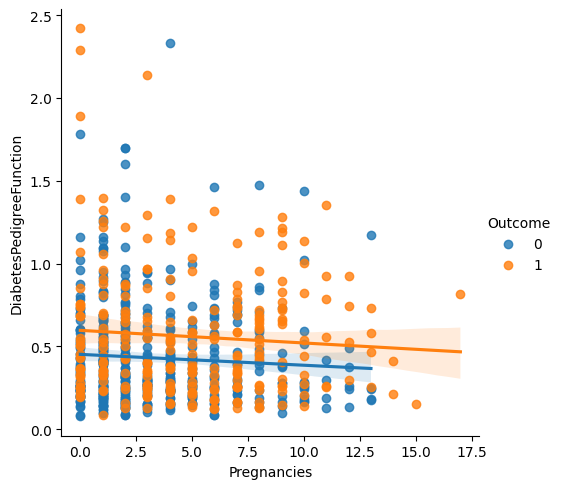

In [ ]:
"""Скрипт построения графиков lmplot

    для визуализации взаимосвязи признаков беременности, ИМТ, наследственности и диабета"""

# Библиотеку Seaborn и Matplotlib мы уже импортировали ранее
# Строим lmplot1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,9))
lmplot_1 = sns.lmplot(
    data=diabet,
    y='BMI',
    x='Pregnancies',
    hue='Outcome'
)

# Строим Impot2
lmplot_2 = sns.lmplot(
    data=diabet,
    y='DiabetesPedigreeFunction',
    x='Pregnancies',
    hue='Outcome'
)



**Выводы:**  
1. График 1 (влияние количества беременностей, ИМТ на развитие диабета): в группе с диабетом преобладают женщины с ожирением (ИМТ от 30) как с отсутствием, так и с наличием беременностей в анамнезе. Однако среди женщин с ожирением и числом беременностей 0-2, больше здоровых, чем у женщин с ожирением и количеством беременностей 3 и более в анамнезе. С увеличением количества беременностей увеличивается число женщин с диабетом даже при нормальном ИМТ.
2. График 2 (влияние количества беременностей и наследственности на развитие диабета): не выявлено взаимосвязи между количеством беременностей и отягощенной по диабету родословной, наоборот, прослеживается отрицательная взаимосвязь признаков.  
**Увеличение количества беременностей повышает вероятность заболевания диабетом, что было показано и на коробчатом графике, и этот признак оказался не зависимым от ИМТ и отягощенной наследственности**


**Как известно, увеличение ИМТ коррелирует с нарушением толерантности к глюкозе. Для визуализации взаимосвязи этих признаков в разрезе признака диабета построим lmplot.**

Text(0.5, 1.0, 'Взаимосвязь диабета, ИМТ и показателя глюкозы')

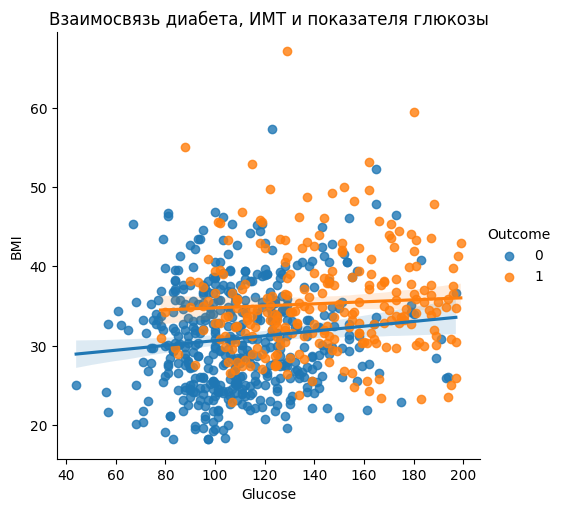

In [ ]:
"""Скрипт построения lmplot

   для визуализации взаимосвязи признаков диабета, ИМТ и показателя глюкозы"""

# Строим lmplot
sns.lmplot(
    data=diabet,
    y='BMI',
    x='Glucose',
    hue='Outcome',
)
plt.title('Взаимосвязь диабета, ИМТ и показателя глюкозы')

**Выводы:**  
1. Наибольшее количество здоровых наблюдается среди женщин с нормальным ИМТ (ИМТ до 25) и нормальным уровнем глюкозы в крови (до 140).  
2. В то же время большое количество женщин с избыточной массой тела (ИМТ 25-29,9) и ожирением (ИМТ более 30) также имеют нормальный показатель глюкозы и являются здоровыми по признаку диабета.  
**Это показывает вероятность влияния других факторов на развитие диабета - например, артериального давления, возраста, наследственности, которые также необходимо оценивать**  
3. Наибольшее число больных диабетом наблюдается в группе женщин с ожирением (ИМТ 30 и более), у большого количества таких женщин уровень глюкозы в пределах нормального референса, что может свидетельствовать об эффективной коррекции медикаментозного лечения и/или соблюдения диеты.  
4. Количество наблюдений в группе больных диабетом значительно преобладает над здоровыми у женщин с повышением глюкозы выше референса, что вполне логично. Уровень глюкозы в крови - важнейший диагностический критерий сахарного диабета.


**Оценим взаимосвязь признаков ИМТ и артериального давления в разрезе развития диабета.**

Text(0.5, 1.0, 'Взаимосвязь диабета, ИМТ и диaстолического артериального давления')

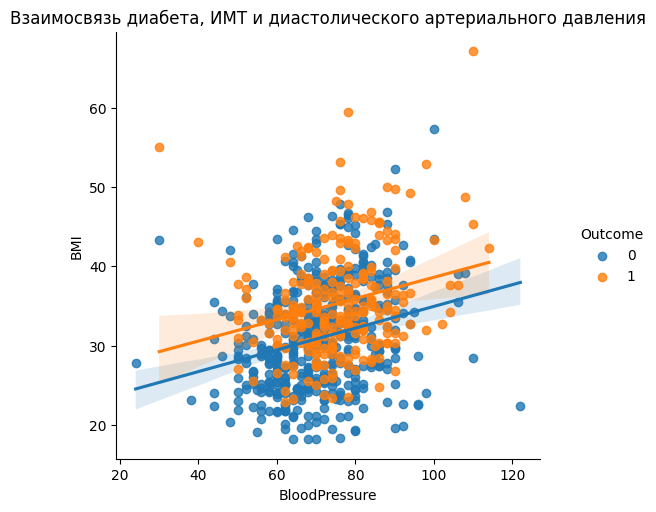

In [ ]:
"""Скрипт построения lmplot

   для визуализации взаимосвязи признаков диабета, ИМТ и дистолического артериального давления"""

sns.lmplot(
    data=diabet,
    y='BMI',
    x='BloodPressure',
    hue='Outcome',
)
plt.title('Взаимосвязь диабета, ИМТ и диaстолического артериального давления')

**Выводы:**  
1. В группе здоровых наибольшее количество наблюдений отмечается у женщин с нормальным дистолическим артериальным давлением (ДАД до 90) при ИМТ, соответствующему как норме, так и отклонениям от референса.
2. Наибольшее число больных диабетом наблюдается у женщин с избыточной массой тела и ожирением (ИМТ от 25).  
3. У пациенток с диабетом и ожирением отмечаются более высокие цифры ДАД по сравнению со здоровыми (90 и более). Однако изолированное повышение ДАД у женщин с нормальным весом не показывает взаимосвязь с развитием диабета, хотя таких наблюдений немного.
**Для более точной оценки влияния артериального давления на развитие диабета необходимы данные систолического артериального давления.  
Ожирение и артериальная гипертензия являются симптомами метаболического синдрома, который, как известно, имеет прямое влияние на развитие сахарного диабета**

**Для удобства сделаем преобразования со столбцом Age. Для этого посмотрим характеристики Age в статистической таблице и применим их в следующем коде.**

In [ ]:
"""Скрипт деления возраста по декадам"""

def convert_age(age:pd.Int64Dtype)-> pd.StringDtype:
  """Функция преобразования возраста в декады"""
  if age > 20 and age < 30:
    return '20-29'
  elif age >= 30 and age < 40:
    return '30-39'
  elif age >= 40 and age < 50:
    return '40-49'
  elif age >= 50 and age < 60:
    return '50-59'
  elif age >= 60 and age < 70:
    return '60-69'
  elif age >= 70 and age < 80:
    return '70-79'
  else:
    return '80+'

# применим лямбда функцию к столбцу возраст,
#предварительно создав копию нашего датасета и сохранив ее в переменную diabet_age
diabet_age = diabet.copy()
diabet_age['AgeDecade'] = diabet['Age'].apply(lambda x: convert_age(x))
"""Лямбда-функция - анонимная функция, включающая одно выражение"""

print(diabet_age)

     Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0              6      148             72  33.6                     0.627   50   
1              1       85             66  26.6                     0.351   31   
2              8      183             64  23.3                     0.672   32   
3              1       89             66  28.1                     0.167   21   
4              0      137             40  43.1                     2.288   33   
..           ...      ...            ...   ...                       ...  ...   
719           10      101             76  32.9                     0.171   63   
720            2      122             70  36.8                     0.340   27   
721            5      121             72  26.2                     0.245   30   
722            1      126             60  30.1                     0.349   47   
723            1       93             70  30.4                     0.315   23   

     Outcome AgeDecade  
0 

**Посмотрим на взаимосвязь диабета, возраста (пока не преобразованного на декады) и родословной.**

Text(0.5, 1.0, 'Взаимосвязь диабета, возраста и родословной')

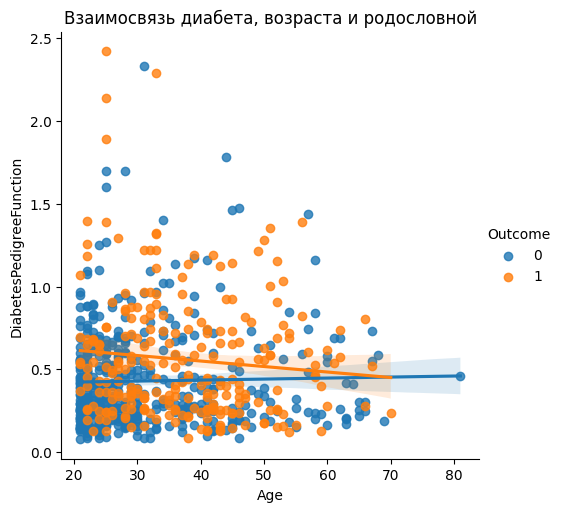

In [ ]:
"""Скрипт построения lmplot

   для визуализации взаимосвязи диабета, возраста и родословной"""

# Строим график lmplot
sns.lmplot(
    data=diabet,
    y='DiabetesPedigreeFunction',
    x='Age',
    hue='Outcome',
)
plt.title('Взаимосвязь диабета, возраста и родословной')


**Выводы:**
1. В наших данных в группе здоровых преобладают женщины молодого возраста (до 30 лет) с неотягощенной / незначительно отягощенной наследственностью (вероятность диабета до 0,8 на основе семейного анамнеза)
2. Четкой прямой зависимости между семейным анамнезом и развитием диабета не выявлено, что может быть обусловлено затруднением сбора анамнеза у индейских женщин или больший вклад сахарного диабета 1 типа (СД1), при котором заболевание манифестирует не в каждом поколении в связи с аутосомно-рецессивным типом наследования.  
3. Также не выявлено явного влияния возраста на развитие диабета в группе больных

**Странным выглядит отсутствие четкой взаимосвязи диабета и возраста. Возможно, среди женщин действительно больше больных СД1, когда заболевание манифестирует в молодом возрасте, либо преобладание женщин молодого возраста в нашем датасете. Посмотрим на распределение возраста, преобразованного ранее на декады.**

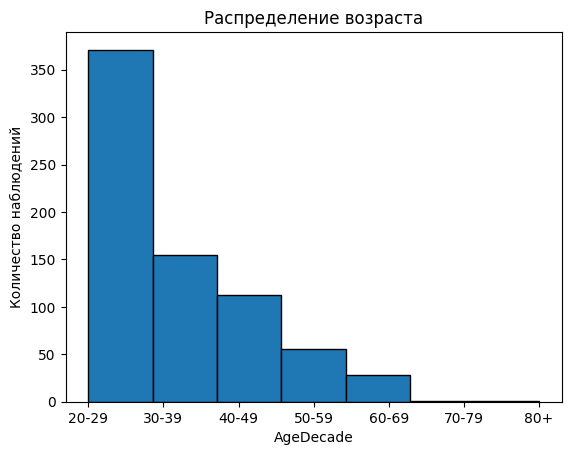

In [ ]:
"""Скрипт построения гистограммы

   распределения возраста"""

# Отсортируем столбец 'AgeDecade'
diabet_age.sort_values(by=['AgeDecade'], inplace=True)
# Строим гистограмму
plt.hist(diabet_age['AgeDecade'], edgecolor='black', bins=7)
plt.title('Распределение возраста')
plt.xlabel('AgeDecade')
plt.ylabel('Количество наблюдений')

plt.show()

**Вывод:**  
В наших данных действительно преобладают женщины молодого возраста (21-29 лет), поэтому признак возраста может не показывать такое влияние на развитие диабета в связи с меньшим количеством заболевания в молодом возрасте, если речь идет о сахарном диабете 2 типа.

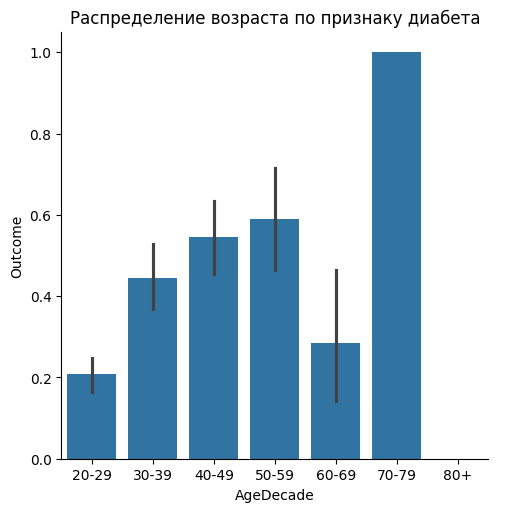

In [ ]:
"""Скрипт построения catplot

   для оценки распределения возраста по признаку диабета"""

# Строим catplot
sns.catplot(kind= 'bar', x= 'AgeDecade', y= 'Outcome', data= diabet_age)
plt.title('Распределение возраста по признаку диабета')

plt.show()

**Выводы:**  
1. Менее всего диабет наблюдается в возрастной группе 20-29 лет, но, как мы визуализировали ранее, эта возрастная группа является наиболее частой в нашем DataFrame.  
2. В возрасте 70-79 лет наличие диабета является 100% признаком, но таких пациенток - единицы, как представлено на графике распределения возраста выше. Проверим это.

In [ ]:
# Вывод информации о количестве значений в таблице diabet для пациенток от 70 до 80 лет
print(diabet[(diabet['Age']>=70) & (diabet['Age']<80)].count())

Pregnancies                 1
Glucose                     1
BloodPressure               1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64


**Все верно, такая пациентка только 1.**

**Проверим правильность сделанных ранее выводов, для этого построим тепловую карту корреляции всех признаков**

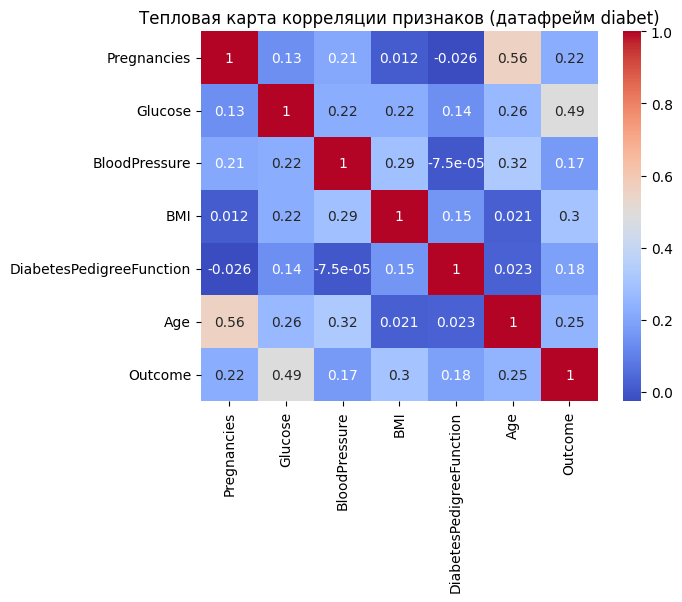

In [ ]:
"""Скрипт построения тепловой карты корреляции признаков"""

corr = diabet.corr()
"""Метод corr() для вычисления матрицы корреляций"""

# Строим тепловую карту
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции признаков (датафрейм diabet)')

plt.show()

**Выводы:**  
1. Наибольшую прямую корреляцию с диабетом показывает признак Glucose, что подтверждает диагностическую значимость теста толерантности к глюкозе для подтверждения диабета.
2. Вторым по значимости является признак BMI (ИМТ), на представленных графиках была показана взаимосвязь между увеличением ИМТ и развитием диабета.  
3. Возраст и количество беременностей вносят примерно одинаковый вклад в развитие диабета и обладают меньшей корреляционной связью с диабетом по сравнению с признаками уровня глюкозы в крови и ИМТ.
4. Наименьшей значимостью в развитии диабета обладают такие факторы, как уровень диастолического давления и наследственность, их вклад в развитие диабета одинаков.

**Прочитаем второй датасет для дальнейшего анализа данных**

In [ ]:
# Считываем csv - файл в DataFrame
test = pd.read_csv('/content/gdrive/My Drive/data/test.csv')

In [ ]:
# Копируем датасет test и сохраняем его в переменную diabet_2
diabet_2 = test.copy()
# Выводим информацию о diabet_2
diabet_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


**Наша таблица представляет собой DataFrame, столбцами которой являются объекты Series. В таблице имеется 848 строк и 16 столбцов, нет пропущенных значений.
Значения 5 столбцов ('id', 'age', 'prevalentStroke', 'prevalentHyp', 'diabetes' имеют тип pd.Int64Dtype, 2 столбца ('sex', 'is_smoking') - тип pd.ObjectDtype, остальные 9 столбцов - тип pd.Float64Dtype.**

In [ ]:
# Выводим первые 5 строк diabet_2
diabet_2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


**Охарактеризуем столбцы:**  

**1.id** - идентификационный номер, числовой признак.  
**2.age** - возраст, числовой признак.  
**3.education** - образование.  
**4.sex** - пол. M - мужской пол, F - женский пол.  
**5.is_smoking**- фактор курения, категориальный признак (YES/NO).  
**6.cigsPerDay** - количество выкуриваемых сигарет в день, числовой признак.  
**7.BPMeds** - получает ли пациент медикаментозную антигипертензивную терапию, номинальный признак.  
**8.prevalentStroke** - наличие инсульта в анамнезе, номинальный признак.  
**9.prevalentHyp**  - наличие гипертонии, номинальный признак.  
**10.diabetes** - наличие диабета, номинальный признак.  
**11.totChol** - уровень общего холестерина, числовой признак.  
**12.sysBP** - систолическое артериальное давление, числовой признак.  
**13.diaBP** - диастолическое артериальное давление, числовой признак.  
**14.BMI**  - ИМТ (индекс массы тела), числовой признак.  
**15.heartRate** - ЧСС (частота сердечных сокрвщений), числовой признак.  
**16.glucose**  - уровень глюкозы, числовой признак. В столбце есть пропущенные значения, обозначенные NAN


**Учитывая, что в первом датасете diabet были наблюдения только по женщинам, создадим новый датасет, выбрав в diabet_2 все значения только для женщин, используя фильтрацию. Это необходимо для дальнейшего корректного анализа.**

In [ ]:
"""Скрипт фильтрации DataFrame по полу"""

# создаем DataFrame diabet_female по женщинам с помощью маски
diabet_female = diabet_2[diabet_2['sex']=='F']
# проводим переиндексацию diabet_female
diabet_female.reset_index(inplace=True)
# выводим информацию о diabet_female
diabet_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            496 non-null    int64  
 1   id               496 non-null    int64  
 2   age              496 non-null    int64  
 3   education        486 non-null    float64
 4   sex              496 non-null    object 
 5   is_smoking       496 non-null    object 
 6   cigsPerDay       491 non-null    float64
 7   BPMeds           491 non-null    float64
 8   prevalentStroke  496 non-null    int64  
 9   prevalentHyp     496 non-null    int64  
 10  diabetes         496 non-null    int64  
 11  totChol          488 non-null    float64
 12  sysBP            496 non-null    float64
 13  diaBP            496 non-null    float64
 14  BMI              491 non-null    float64
 15  heartRate        496 non-null    float64
 16  glucose          436 non-null    float64
dtypes: float64(9), i

**В DataFrame diabet_female получилось 496 строк, есть пропущенные значения. Будем с ними разбираться.**

In [ ]:
# выведем первые 5 строк diabet_female
diabet_female.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
5,3395,41,2.0,F,YES,7.0,0.0,0,0,0,260.0,101.0,68.0,22.49,80.0,77.0
7,3397,41,1.0,F,YES,15.0,0.0,0,0,0,242.0,139.0,80.0,19.68,72.0,60.0


**В столбце glucose есть пропуск - NaN.**

In [ ]:
"""Скрипт вывода информации о количестве пропущенных значений в столбцах"""

# В переменную nan_sum заносим результат суммы пропусков по столбцам
nan_sum = diabet_female.isna().sum()

# Выводим nan_sum
print(nan_sum)

index               0
id                  0
age                 0
education          10
sex                 0
is_smoking          0
cigsPerDay          5
BPMeds              5
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             8
sysBP               0
diaBP               0
BMI                 5
heartRate           0
glucose            60
dtype: int64


**Нас интересуют столбцы, совпадающие со столбцами в первом датасете diabet. В столбце BMI пропущено 5 значений, это 1% пропусков в столбце glucose - 60 пропусков, это 12% пропусков.**

In [ ]:
# Вывод информации о сумме нулей по столбцам
print(diabet_female.eq(0).sum())

index                0
id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay         284
BPMeds             471
prevalentStroke    495
prevalentHyp       354
diabetes           486
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
dtype: int64


**Значений, равных 0, в интересующих нас столбцах нет. В столбце diabetes могут быть всего 2 значения - 0 и 1 по признаку наличия или отсутствия заболевания соответственно.**

**Учитывая первостепенную важность показателя уровня глюкозы в крови для исключения / постановки диагноза "Сахарный диабет", необходимо сохранить этот столбец. Поскольку, как отмечалось ранее, нельзя заменять пропуски в медицинских данных (тем более, когда речь идет о важном для диабета показателе), удалим строки с пропущенными значениями в столбце glucose.  
Строк с пропусками в BMI немного, их тоже удалим.**

In [ ]:
"""Скрипт удаления строк с пропущенными значениями
   в столбцах BMI, glucose"""

# Удаляем строки с пропущенными значениями в столбце BMI
diabet_female = diabet_female.dropna(subset=['BMI'])
# Удаляем строки с пропущенными значениями в столбце glucose
diabet_female = diabet_female.dropna(subset=['glucose'])

# В переменную nan занесем сумму пропущенных значений по столбцам
nan = diabet_female.isna().sum()

# Выводим результат
print(nan)


index              0
id                 0
age                0
education          9
sex                0
is_smoking         0
cigsPerDay         4
BPMeds             5
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            1
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64


In [ ]:
# Выполняем переиндексацию deabet_female
diabet_female.reset_index(inplace=True)
# Выводим информацию
diabet_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          433 non-null    int64  
 1   index            433 non-null    int64  
 2   id               433 non-null    int64  
 3   age              433 non-null    int64  
 4   education        424 non-null    float64
 5   sex              433 non-null    object 
 6   is_smoking       433 non-null    object 
 7   cigsPerDay       429 non-null    float64
 8   BPMeds           428 non-null    float64
 9   prevalentStroke  433 non-null    int64  
 10  prevalentHyp     433 non-null    int64  
 11  diabetes         433 non-null    int64  
 12  totChol          432 non-null    float64
 13  sysBP            433 non-null    float64
 14  diaBP            433 non-null    float64
 15  BMI              433 non-null    float64
 16  heartRate        433 non-null    float64
 17  glucose         

**Для корректного объединения двух датасетов переименуем интересующие нас столбцы age, diabetes, diaBP, glucose**

In [ ]:
"""Скрипт переименования столбцов"""

# Создаем словарь, где ключи - старые названия столбцов, значения - новые названия столбцов, соответствующие DataFrame diabet
new_names = {'age': 'Age', 'diabetes': 'Outcome', 'diaBP': 'BloodPressure', 'glucose': 'Glucose'}
# Переименовываем столбцы
diabet_female.rename(columns=new_names, inplace=True)
# Выводим первые 5 строк diabet_female с переименованными столбцами
diabet_female.head()

,level_0,index,id,Age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,Outcome,totChol,sysBP,BloodPressure,BMI,heartRate,Glucose
0,0,1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
1,2,3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
2,3,5,3395,41,2.0,F,YES,7.0,0.0,0,0,0,260.0,101.0,68.0,22.49,80.0,77.0
3,4,7,3397,41,1.0,F,YES,15.0,0.0,0,0,0,242.0,139.0,80.0,19.68,72.0,60.0
4,6,10,3400,46,2.0,F,NO,0.0,0.0,0,0,0,229.0,125.0,80.0,27.27,66.0,80.0


**В наших двух датасетах diabet и diabet_female есть общие столбцы с разным типом данных, приведем их к одному типу.**

In [ ]:
"""Скрипт приведения столбцов к другому типу данных"""

# Создаем словарь, где ключи - названия столбцов, значения - новый тип данных
new_types = {'BloodPressure': int, 'Glucose': int}
# Преобразуем столбцы BloodPressure, Glucose в новый тип данных
diabet_female = diabet_female.astype(new_types)

# Выводим информацию о diabet_female
diabet_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          433 non-null    int64  
 1   index            433 non-null    int64  
 2   id               433 non-null    int64  
 3   Age              433 non-null    int64  
 4   education        424 non-null    float64
 5   sex              433 non-null    object 
 6   is_smoking       433 non-null    object 
 7   cigsPerDay       429 non-null    float64
 8   BPMeds           428 non-null    float64
 9   prevalentStroke  433 non-null    int64  
 10  prevalentHyp     433 non-null    int64  
 11  Outcome          433 non-null    int64  
 12  totChol          432 non-null    float64
 13  sysBP            433 non-null    float64
 14  BloodPressure    433 non-null    int64  
 15  BMI              433 non-null    float64
 16  heartRate        433 non-null    float64
 17  Glucose         

**Интересующие нас столбцы преобразованы.  
Можно переходить к объединению двух DataFrame - diabet и diabet_female.  
Будем объединять по строкам по ключевым столбцам, которые есть в обеих таблицах -  Age, BloodPressure, BMI, Glucose, Outcome.**

In [ ]:
"""Скрипт объединения двух DataFrame

   по строкам по ключевым столбцам"""

# Объединяем diabet и diabet_female с помощью метода concat,
# в параметр join устанавливаем 'inner' для объединения по ключевым столбцам,
# результат сохраняем в переменную diabet_12
diabet_12 = pd.concat([diabet, diabet_female], join='inner')
"""Метод concat() используется для конкатенации датафреймов, по умолчанию - по строкам"""

# Переиндексируем объединенный DataFrame
diabet_12.reset_index(inplace=True)
# Выводим информацию об объединенном DataFrame
diabet_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1157 non-null   int64  
 1   Glucose        1157 non-null   int64  
 2   BloodPressure  1157 non-null   int64  
 3   BMI            1157 non-null   float64
 4   Age            1157 non-null   int64  
 5   Outcome        1157 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 54.4 KB


**В объединенном DataFrame 1157 строк, 6 столбцов.  
Удалим столбец index.**

In [ ]:
# Удалем столбец index
diabet_12 = diabet_12.drop(columns=['index'])
# Выводим первые 5 строк diabet_12
diabet_12.head()

,Glucose,BloodPressure,BMI,Age,Outcome
0,148,72,33.6,50,1
1,85,66,26.6,31,0
2,183,64,23.3,32,1
3,89,66,28.1,21,0
4,137,40,43.1,33,1


In [ ]:
# Выводим статистическую информацию о diabet_12
diabet_12.describe()

,Glucose,BloodPressure,BMI,Age,Outcome
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,106.304235,76.182368,29.885557,39.471046,0.222990
std,33.361226,13.092449,6.894397,13.299787,0.416432
min,40.000000,24.000000,17.110000,21.000000,0.000000
25%,79.000000,68.000000,24.600000,27.000000,0.000000
50%,100.000000,76.000000,28.700000,40.000000,0.000000
75%,126.000000,84.000000,34.200000,50.000000,0.000000
max,250.000000,140.000000,67.100000,81.000000,1.000000


**Отметим изменения в столбце Age. Минимальное, макстиальное значение возраста осталось без изменений (21-81 лет), а вот медиана и среднее значение увеличились - 40 и 39,5 лет соответственно, что говорит о добавлении более возрастных пациенток в объединенный DataFrame.  
Также уменьшилась медиана и среднее значение BMI до 28,7 - 30 соотвественно.   
Изменились статистические показатели уровня глюкозы. Уменьшилась медиана и среднее показателя глюкозы - до 100 и 106 соответственно, разброс значений составляет от 40 до 250.**

**Посмотрим, как изменилась тепловая карта корреляции признаков после объединения наших датафреймов.**

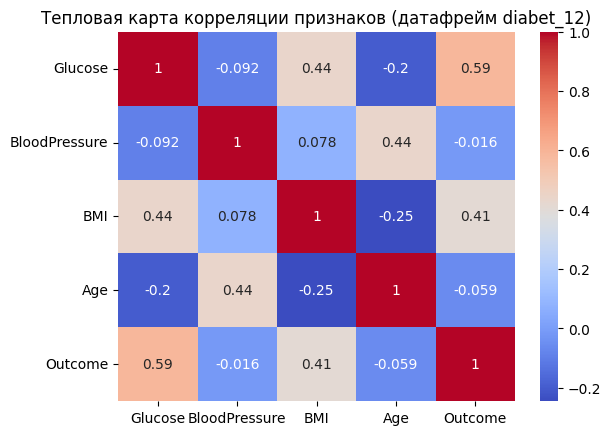

In [ ]:
"""Скрипт построения тепловой карты корреляции признаков"""

corr = diabet_12.corr()
"""Метод corr() для вычисления матрицы корреляций"""
# Строим тепловую карту
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции признаков (датафрейм diabet_12)')

plt.show()

**Выводы:**  
1. ИМТ (BMI) показывает более значимую корреляцию с диабетом по сравнению с первым DataFrame(diabet), его значение повысилось от 0.3 до 0.41.  
2. Уровень глюкозы (Glucose) также показывает большую корреляцию с диабетом, этот показатель увеличился до 0.59 (0.49 в первом датафреймe).  
3. Отрицательная корреляция с диабетом появилась у показателя возраста (Age) и ДАД (BloodPressure).  
***Проведем визуализацию влияния признаков уровня глюкозы и ИМТ на развитие диабета.***


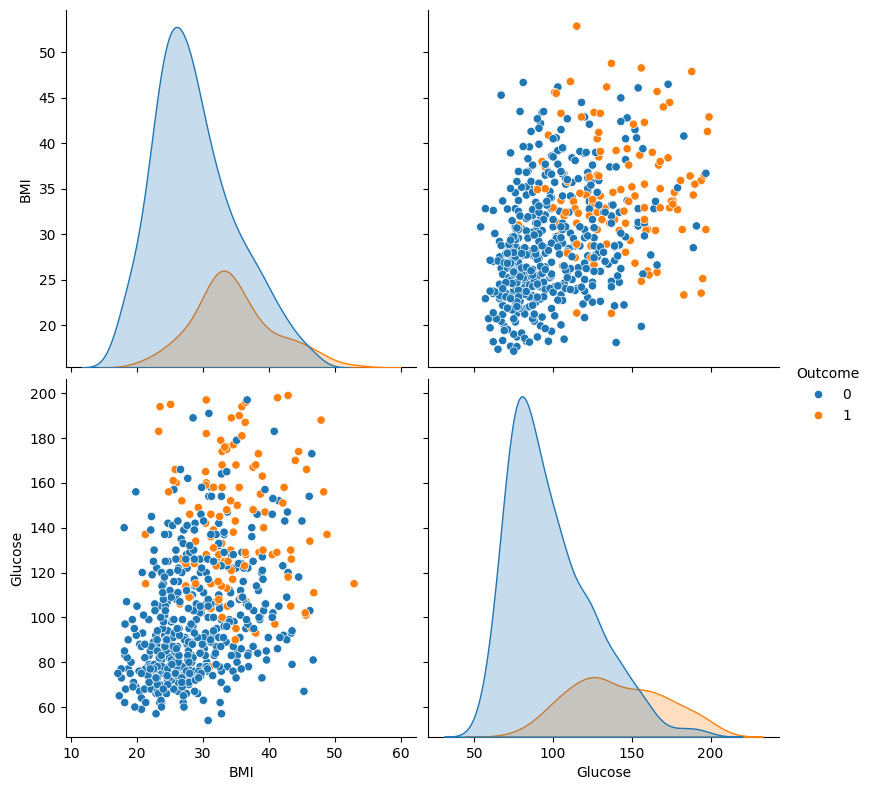

In [ ]:
"""Скрипт построения pairplot"""

# Строим pairplot для визуализации взаимосвязи BMI, Glucose и Outcome (диабета)
sns.pairplot(
    diabet_12[['BMI', 'Glucose', 'Outcome']].sample(
    frac=0.5,
    random_state=42),
    hue='Outcome',
    height=4,
    )

**Выводы:**  
1. Количество наблюдений в группе здоровых женщин превалирует при ИМТ менее 35 и нормальном уровне глюкозы (до 140)  
2. Число больных диабетом значительно больше в группе пациенток с увеличенным ИМТ (более 29) и уровнем глюкозы более 140.

**Переходим к работе с третьим датасетом.**

In [ ]:
# Считываем csv - файл в DataFrame и заносим его в переменную diabet_3
diabet_3 = pd.read_csv('/content/gdrive/My Drive/data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# Выводим информацию о diabet_3
diabet_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

**В нашем DataFrame 70692 строки, 22 столбца. Нет пропущенных значений, значения всех столбцов относятся к типу pd.Float64Dtype. А значит, и значений, равных 0, в нашем DataFrame нет.**

In [ ]:
# Выводим информацию о столбцах в diabet_3
print(diabet_3.columns)


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


**Нас интересуют столбцы, общие с предыдущими объединенными датасетами:**  
**Diabetes_binary** - признак диабета, 0.0 - отсутствие диабета, 1.0 - диабет/преддиабет.  
**HighBP** - критерий давления, 0.0 - нормальное, 1.0 - повышенное.  
**BMI** - индекс массы тела (ИМТ), критерии ИМТ описаны ранее.  
**Sex** - пол, 0.0 - женщины, 1.0 - мужчины. Этого столбца нет в объединенном датасете, но по нему мы будем выбирать только женщин.  
**Age** - возраст, категориальный признак:  


*   **1** - 18-24 года
*   **2** - 25-29 лет  
*   **3** - 30-34 года
*   **4** - 35-39 лет  
*   **5** - 40-44 года
*   **6** - 45-49 лет
*   **7** - 50-54 года
*   **8** - 55-59 лет
*   **9** - 60-64 года
*  **10** - 65-69 лет
*   **11** - 70-74 года
*   **12** - 75-79 лет
*   **80** - от 80 лет

**Остальные столбцы удалим.**

In [ ]:
"""Скрипт удаления столбцов"""

# Удаляем ненужные столбцы
diabet_3 = diabet_3.drop(columns=['HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Education',
       'Income'])
# Посмотрим первые 5 строк нашей таблицы
diabet_3.head()


,Diabetes_binary,HighBP,BMI,Sex,Age
0,0.0,1.0,26.0,1.0,4.0
1,0.0,1.0,26.0,1.0,12.0
2,0.0,0.0,26.0,1.0,13.0
3,0.0,1.0,28.0,1.0,11.0
4,0.0,0.0,29.0,0.0,8.0


**Столбцы, с которыми мы не будем работать, удалены.**

In [ ]:
"""Скрипт фильтрации DataFrame по полу"""

# создаем DataFrame diabet_woman по женщинам с помощью маски,
# 0.0 - женщины
diabet_woman = diabet_3[diabet_3['Sex']==0.0]
# переиндексируем diabet_woman
diabet_woman.reset_index(inplace=True)
# выводим информация о diabet_woman
diabet_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38386 entries, 0 to 38385
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            38386 non-null  int64  
 1   Diabetes_binary  38386 non-null  float64
 2   HighBP           38386 non-null  float64
 3   BMI              38386 non-null  float64
 4   Sex              38386 non-null  float64
 5   Age              38386 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


**В отфильтрованном DataFrame остались женщины, получилось 38386 строк, 6 столбцов. Удалим столбцы index и Sex.**

In [ ]:
# Удаляем столбцы index и Sex в diabet_woman
diabet_woman.drop(columns=['index', 'Sex'], inplace = True)
# Выводим первые 5 строк нашей таблицы
diabet_woman.head()

<ipython-input-21-5fc13c25fd34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabet_woman.drop(columns=['index', 'Sex'], inplace = True)


,Diabetes_binary,HighBP,BMI,Age
0,0.0,0.0,29.0,8.0
1,0.0,0.0,18.0,1.0
2,0.0,0.0,32.0,3.0
3,0.0,1.0,24.0,12.0
4,0.0,0.0,29.0,10.0


**Переименуем столбцы Diabetes_binary, HighBP для последующего корректного объединения с предыдущим объединенным DataFrame.**

In [ ]:
"""Скрипт переименования столбцов"""

# Создаем словарь, где ключи - старые названия столбцов, значения - новые названия столбцов, соответствующие DataFrame diabet_12
new_col = {'Diabetes_binary': 'Outcome', 'HighBP': 'BloodPressure'}

# Переименовываем столбцы в diabet_woman
diabet_woman.rename(columns=new_col, inplace=True)
# Выводим первые 5 строк diabet_woman с переименованными столбцами
diabet_woman.head()

<ipython-input-22-565ad947710a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabet_woman.rename(columns=new_col, inplace=True)


,Outcome,BloodPressure,BMI,Age
0,0.0,0.0,29.0,8.0
1,0.0,0.0,18.0,1.0
2,0.0,0.0,32.0,3.0
3,0.0,1.0,24.0,12.0
4,0.0,0.0,29.0,10.0


**Нужные нам столбцы переименованы. Теперь приведем значения в столбцах к одному типу данных с предыдущим объединенным DataFrame.**

In [ ]:
# Сначала вспомним тип данных столбцов в объединенном DataFrame diabet_12
diabet_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        1157 non-null   int64  
 1   BloodPressure  1157 non-null   int64  
 2   BMI            1157 non-null   float64
 3   Age            1157 non-null   int64  
 4   Outcome        1157 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 45.3 KB


**В нашем DataFrame столбец BMI имеет тип данных pd.Float64Dtype, остальные столбцы имеют тип pd.Int64Dtype. Приведем интересующие нас столбцы Age, Outcome и BloodPressure в датафрейме diabet_woman к типу pd.Int64Dtype**

In [ ]:
"""Скрипт приведения столбцов к другому типу данных"""

# Создаем словарь, где ключи - названия столбцов, значения - новый тип данных
new_typ = {'BloodPressure': int, 'Outcome': int, 'Age': int}
# Преобразуем столбцы BloodPressure, Glucose в новый тип данных
diabet_woman = diabet_woman.astype(new_typ)

# Выводим информацию о diabet_newwoman
diabet_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38386 entries, 0 to 38385
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outcome        38386 non-null  int64  
 1   BloodPressure  38386 non-null  int64  
 2   BMI            38386 non-null  float64
 3   Age            38386 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.2 MB


**Столбцы приведены к новому типу данных.**  
**Осталось в нашем предыдущем объединенном DataFrame diabet_12 выполнить преобразования столбца BloodPressure для корректного объединения с diabet_woman.**  
**Для этого необходимо заменить значения меньше 90 на 0 (нормальное ДАД), а значения, большие либо равные 90 - на 1 (высокое ДАД).**  


In [ ]:
"""Скрипт переопределения значений в столбце"""

# Применим лямбда функцию к столбцу BloodPressure в объединенном датафрейме diabet_12:
# значения меньше 90 заменим на 0, остальные (90 и больше) - на 1
diabet_12['BloodPressure'] = diabet_12['BloodPressure'].apply(lambda x: 0 if x < 90 else 1)
"""Лямбда-функция - анонимная функция, включающая одно выражение"""

# Выведем первые 5 строк преобразованного diabet_12
diabet_12.head()

,Glucose,BloodPressure,BMI,Age,Outcome
0,148,0,33.6,50,1
1,85,0,26.6,31,0
2,183,0,23.3,32,1
3,89,0,28.1,21,0
4,137,0,43.1,33,1


**Переведем возраст в категориальный признак, как в третьем датасете**

In [ ]:
"""Скрипт переопределения столбца Age в diabet_12"""

def func_age(age:pd.Int64Dtype)-> pd.Int64Dtype:
  if age >= 18 and age <= 24:
    return 1
  if age >= 25 and age <=29:
    return 2
  if age >= 30 and age <= 34:
    return 3
  if age >= 35 and age <= 39:
    return 4
  if age >= 40 and age <= 44:
    return 5
  if age >= 45 and age <= 49:
    return 6
  if age >= 50 and age <= 54:
    return 7
  if age >= 55 and age <= 59:
    return 8
  if age >= 60 and age <= 64:
    return 9
  if age >= 65 and age <= 69:
    return 10
  if age >= 70 and age <= 74:
    return 11
  if age >= 75 and age <= 79:
    return 12
  if age >= 80:
    return 13

# Применяем полученную функцию к столбцу Age diabet_12
diabet_12['Age'] = diabet_12['Age'].apply(func_age)
# Выведем первые 5 строк преобразованного diabet_12
diabet_12.head()

,Glucose,BloodPressure,BMI,Age,Outcome
0,148,0,33.6,7,1
1,85,0,26.6,3,0
2,183,0,23.3,3,1
3,89,0,28.1,1,0
4,137,0,43.1,3,1


**Столбцы преобразованы, переходим к объединению датафреймов.**

In [ ]:
"""Скрипт объединения двух DataFrame по строкам по ключевым столбцам"""

# Объединям diabet_12 и diabet_woman по строкам по столбцам Outcome, BMI, BloodPressure, Age,
# объединенный датафрейм сохраняем в переменную diabet_123
diabet_123 = pd.concat([diabet_12, diabet_woman], join='inner')
"""Метод concat() используется для конкатенации датафреймов, по умолчанию - по строкам"""

# Переиндексируем объединенный DataFrame
diabet_123.reset_index(inplace=True)
# Выводим информацию об объединенном DataFrame
diabet_123.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39543 entries, 0 to 39542
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          39543 non-null  int64  
 1   BloodPressure  39543 non-null  int64  
 2   BMI            39543 non-null  float64
 3   Age            39543 non-null  int64  
 4   Outcome        39543 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.5 MB


**В объединенном датафрейме получилось 39543 записи, 5 столбцов. Удалим столбец index.**

In [ ]:
# Удаляем столбец index в diabet_123
diabet_123 = diabet_123.drop(columns=['index'])
# Выводим первые 5 строк diabet_123
diabet_123.head()

,BloodPressure,BMI,Age,Outcome
0,0,33.6,7,1
1,0,26.6,3,0
2,0,23.3,3,1
3,0,28.1,1,0
4,0,43.1,3,1


In [ ]:
# Выведем статистическую информацию об объединенном датафрейме diabet_123
diabet_123.describe()

,BloodPressure,BMI,Age,Outcome
count,39543.000000,39543.000000,39543.000000,39543.000000
mean,0.533015,29.852580,8.470526,0.472119
std,0.498915,7.671589,2.935559,0.499228
min,0.000000,13.000000,1.000000,0.000000
25%,0.000000,25.000000,7.000000,0.000000
50%,1.000000,28.000000,9.000000,0.000000
75%,1.000000,34.000000,11.000000,1.000000
max,1.000000,98.000000,13.000000,1.000000


**Возраст пациенток составляет 18-80 и более лет, медиана - 60-64 года.  
Медиана и среднее ИМТ составили 28 и 30 соответственно с разбросом значений от 13 до 98. Максимум - 98 скорее всего является выбросом.**

**Посмотрим, как изменилась корреляция признаков после объединения**

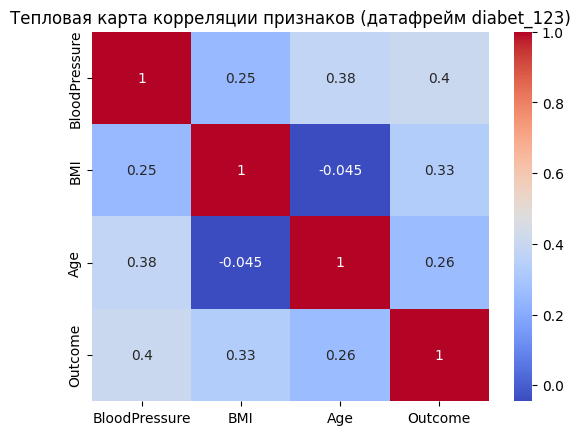

In [ ]:
"""Скрипт построения тепловой карты корреляции признаков"""

corr = diabet_123.corr()
"""Метод corr() для вычисления матрицы корреляций"""

# Строим тепловую карту
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции признаков (датафрейм diabet_123)')

plt.show()

**Выводы:**  
1. Наибольшую взаимосвязь удалось выявить между признаками диабета и давлением (0,4).  
2. Возраст и ИМТ таже показывают корреляцию с диабетом, хоть и в меньшей степени.  
**Взаимосвязь признаков показывает возможное влияние метаболического синдрома, характеризующегося повышенным давлением и увеличенным ИМТ, на развитие диабета.Посмотрим на взаимосвязь признаков дальше.**

**Посмотрим на взаимосвязь признаков ИМТ, артериального давления и диабета**

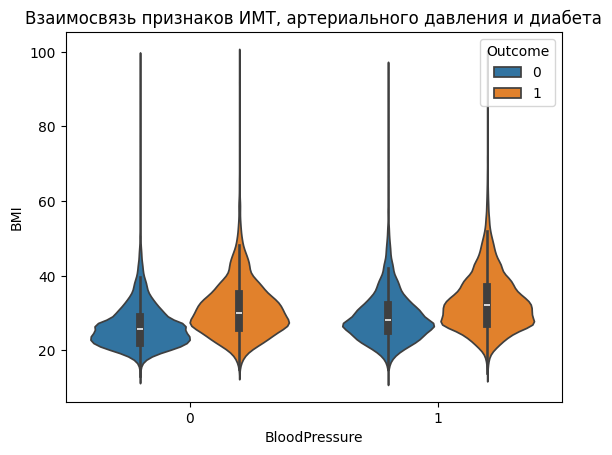

In [ ]:
"""Скрипт построения pairplot"""


# Строим pairplot violinplot взаимодействия признаков ИМТ, давления и диабета
sns.violinplot(x='BloodPressure', y='BMI', hue='Outcome', data=diabet_123)
plt.title('Взаимосвязь признаков ИМТ, артериального давления и диабета')

plt.show()

**Выводы:**  
1. Нормальное артериальное давление в группе здоровых наблюдается при пограничном ИМТ между нормальным и избыточным весом - 25, межквартильный размах ИМТ в этой группе составляет 21-30.  
2. В группе с диабетом/преддиабетом у пациентов с нормальным давлением отмечаются более высокие показатели ИМТ - медиана 30, межквартильный размах 25-37, то есть пациентки с избыточным весом и ожирением страдают диабетом/преддиабетом чаще, даже при нормальном артериальном давлении.  
3. Повышенное артериальное давление у пациенток с отсутствием диабета наблюдается при межквартильном размахе ИМТ 23-35 с медианой 29. То есть мы наблюдаем взаимосвязь между увеличением ИМТ и повышением артериального давления. Форма и ширина графиков показывают, что количество наблюдений отсутствия диабета среди пациенток с избыточной массой тела/ожирением и повышенным давлением меньше, чем количество здоровых пациенток с нормальным давлением и нормальным/избыточным весом.  
4. В группе больных диабетом/преддиабетом у пациенток с повышенным артериальным давлением отмечаются наибольшие отклонения ИМТ от нормы - межквартильный размах 25-39, медиана 34. Количество наблюдений больных диабетом примерно одинаково в группе пациентов с высоким и нормальным артериальным давлением.  
5. Во всех группах есть выбросы по ИМТ, которые мы не будем учитывать и анализировать при дальнейшей визуализации.

**Проанализируем взаимосвязь возраста, ИМТ и диабета.**

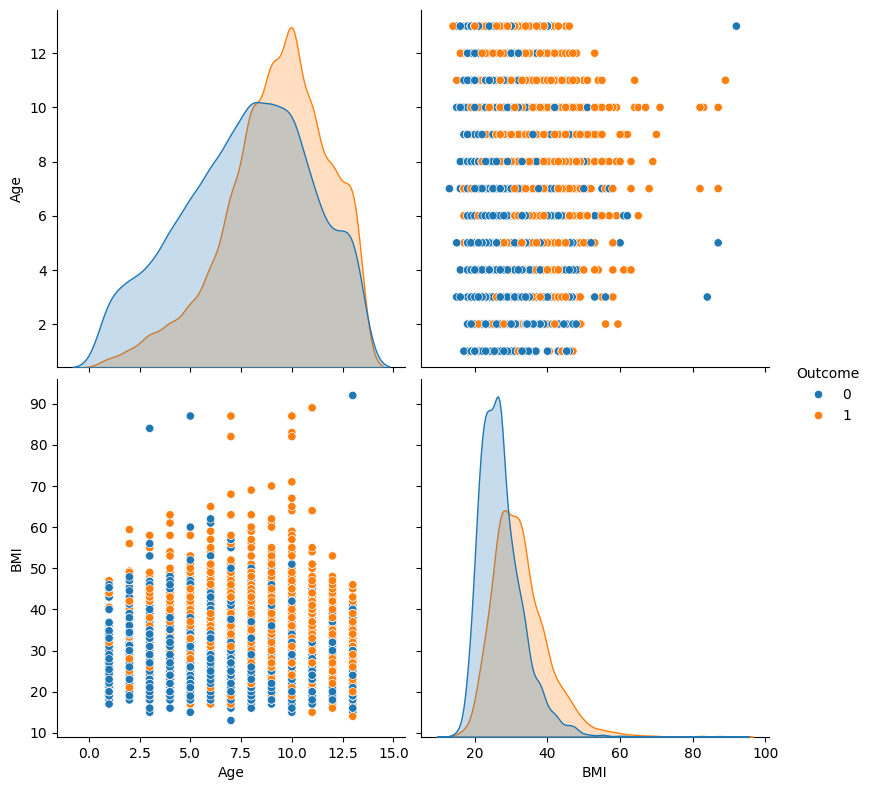

In [ ]:
"""Скрипт построения pairplot"""

# Строим pairplot для визуализации взаимосвязи возраста, ИМТ и диабета
sns.pairplot(
    diabet_123[['Age', 'BMI', 'Outcome']].sample(
    frac=0.2,
    random_state=42),
    hue='Outcome',
    height=4,
    )

**Выводы:**  
1. Большинство наблюдений пациенток с диабетом/преддиабетом сосредоточено в возрастной группе от 40 лет и выше, явное преобладание больных диабетом наблюдается в возрасте от 55 лет, причем у большинства больных диабетом ИМТ составил более 25-30.
2. Среди здоровых всех возрастных групп преобладают женщины с нормальным ИМТ (менее 25).

**Заключение:**  
1. После объединения всех датасетов наиболее существенные изменения взаимодействия признаков показали признаки артериального давления и возраста. Наибольшее количество наблюдений больных диабетом отмечается в возрасте от 40 лет.  
2. Самой высокой оказалась корреляция диабета с артериальным давлением и ИМТ.Более высокие ИМТ у больных диабетом коррелируют с повышенным артериальным давлением, что является прямым указанием на метаболический синдром как предиктор развития диабета. Этот вывод согласуется с медицинскими данными.  
4. Также взаимосвязь высоких цифр ИМТ и повышенного давления в группе здоровых свидетельствует о необходимости принятия мер для снижения веса (диетотерапия, лечебная физическая культура, здоровый образ жизни) для профилактики диабета.